<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Multiple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Coefficients: [-1.06855127e-15  1.00000000e+00]
Intercept: -20.000000000000036


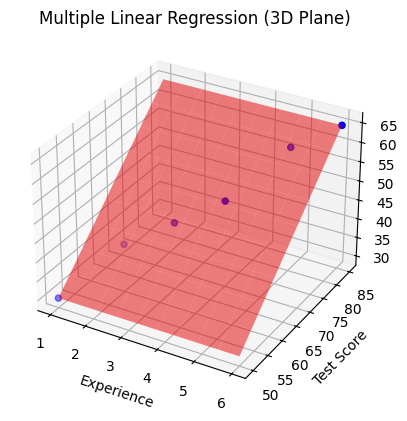

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Features: Experience, Test Score
X = np.array([
    [1, 50],
    [2, 60],
    [3, 65],
    [4, 70],
    [5, 80],
    [6, 85]
])

# Target: Salary
y = np.array([30, 40, 45, 50, 60, 65])

# Model
model = LinearRegression()
model.fit(X, y)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# ---- 3D Visualization ----

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter actual data
ax.scatter(X[:,0], X[:,1], y, color='blue', label='Actual Data')

# Create grid for plane
x1 = np.linspace(X[:,0].min(), X[:,0].max(), 10)
x2 = np.linspace(X[:,1].min(), X[:,1].max(), 10)
x1_grid, x2_grid = np.meshgrid(x1, x2)

y_pred = model.intercept_ + model.coef_[0]*x1_grid + model.coef_[1]*x2_grid

# Plot plane
ax.plot_surface(x1_grid, x2_grid, y_pred, alpha=0.5, color='red')

ax.set_xlabel("Experience")
ax.set_ylabel("Test Score")
ax.set_zlabel("Salary")
ax.set_title("Multiple Linear Regression (3D Plane)")
plt.show()


In [32]:
new_data = np.array([[7, 90]])
prediction = model.predict(new_data)
print("Predicted Salary:", prediction)


Predicted Salary: [70.]


#House Price Prediction

In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Create real-world style dataset
data = {
    'Area': [1000,1500,1800,2400,3000,3500,4000],
    'Bedrooms': [2,3,3,4,4,5,5],
    'Age': [10,8,6,5,3,2,1],
    'Price': [200,250,280,350,400,450,500]
}

house_df = pd.DataFrame(data)

# Features & Target
X_house = house_df[['Area','Bedrooms','Age']]
y_house = house_df['Price']

# Train-Test Split
X_train_house, X_test_house, y_train_house, y_test_house = train_test_split(X_house,y_house,test_size=0.2,random_state=42)

# Model
house_model = LinearRegression()
house_model.fit(X_train_house,y_train_house)

# Prediction
y_pred_house = house_model.predict(X_test_house)

print("R2 Score:", r2_score(y_test_house,y_pred_house))
print("Coefficients:", house_model.coef_)
print("Intercept:", house_model.intercept_)

# New house prediction
new_house_data = pd.DataFrame([[2800,4,4]], columns=X_house.columns)
print("Predicted Price:", house_model.predict(new_house_data))

R2 Score: -0.16206896551724959
Coefficients: [ 0.12758621  3.62068966 13.79310345]
Intercept: -41.20689655172305
Predicted Price: [385.68965517]


#Visualizations

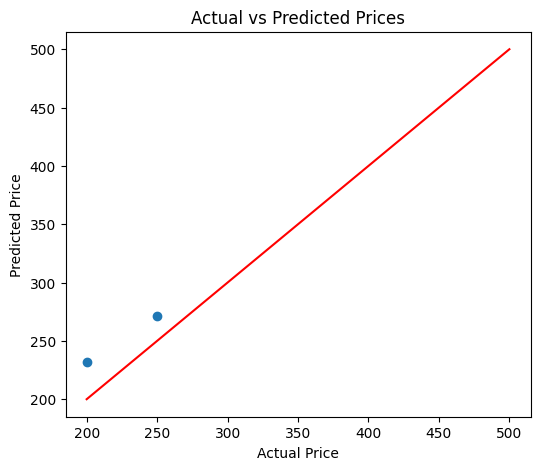

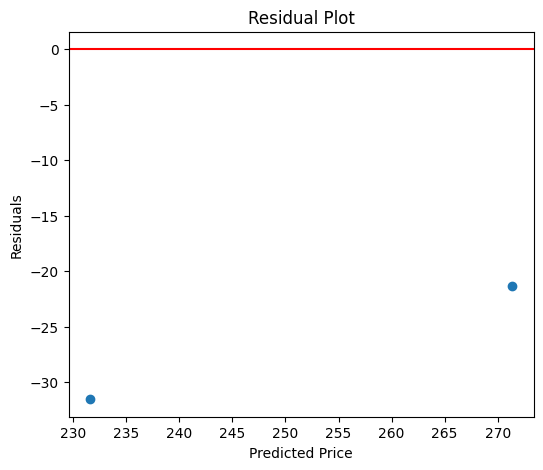

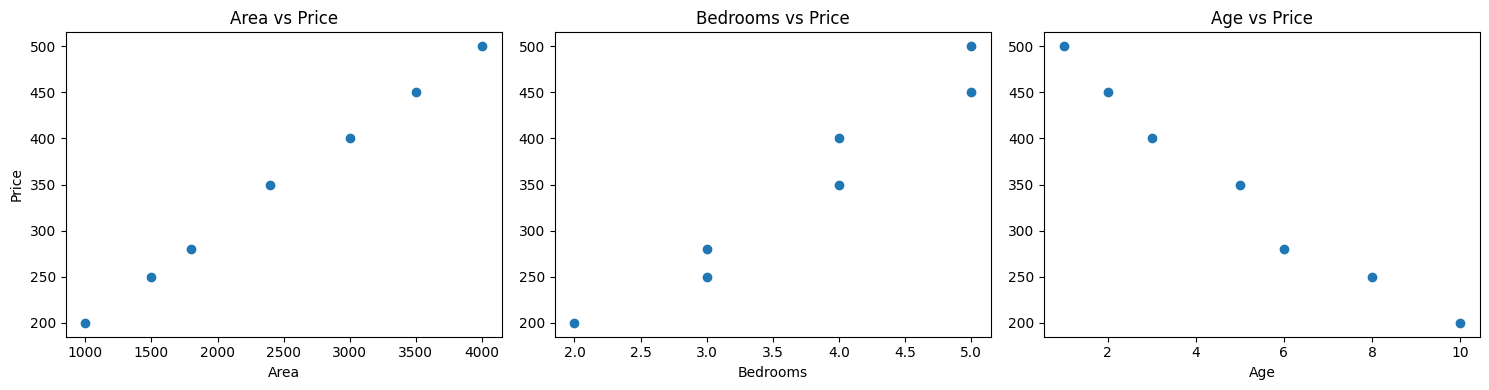

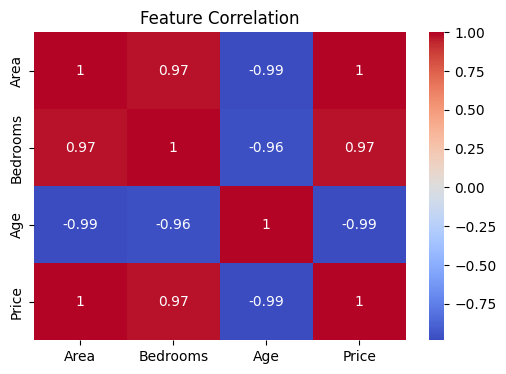

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Actual vs Predicted Plot
# -----------------------------
plt.figure(figsize=(6,5))
plt.scatter(y_test_house, y_pred_house)
plt.plot([y_house.min(), y_house.max()], [y_house.min(), y_house.max()], color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


# -----------------------------
# 2. Residual Plot
# -----------------------------
residuals = y_test_house - y_pred_house

plt.figure(figsize=(6,5))
plt.scatter(y_pred_house, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# -----------------------------
# 3. Feature Relationships
# -----------------------------
plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.scatter(house_df['Area'], house_df['Price'])
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Area vs Price")

plt.subplot(1,3,2)
plt.scatter(house_df['Bedrooms'], house_df['Price'])
plt.xlabel("Bedrooms")
plt.title("Bedrooms vs Price")

plt.subplot(1,3,3)
plt.scatter(house_df['Age'], house_df['Price'])
plt.xlabel("Age")
plt.title("Age vs Price")

plt.tight_layout()
plt.show()


# -----------------------------
# 4. Correlation Heatmap
# -----------------------------
plt.figure(figsize=(6,4))
sns.heatmap(house_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

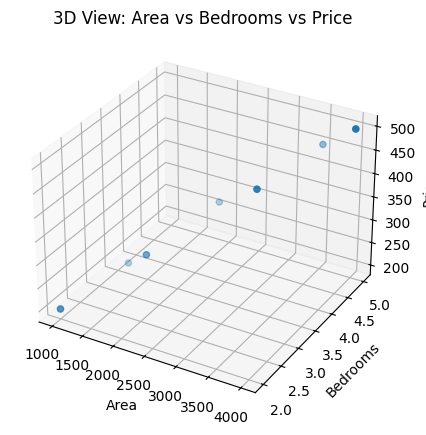

In [35]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(house_df['Area'], house_df['Bedrooms'], house_df['Price'])

ax.set_xlabel("Area")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Price")
ax.set_title("3D View: Area vs Bedrooms vs Price")

plt.show()

#Student Performance Prediction

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression

data = {
    'Study_Hours':[2,3,4,5,6,7,8],
    'Attendance':[60,65,70,75,80,85,90],
    'Previous_Score':[50,55,60,65,70,75,80],
    'Final_Score':[52,57,63,68,74,79,85]
}

student_df = pd.DataFrame(data)

X_student = student_df[['Study_Hours','Attendance','Previous_Score']]
y_student = student_df['Final_Score']

student_model = LinearRegression()
student_model.fit(X_student,y_student)

print("Coefficients:", student_model.coef_)
print("Intercept:", student_model.intercept_)

# New student
new_student_data = pd.DataFrame([[6,82,72]], columns=X_student.columns)
print("Predicted Score:", student_model.predict(new_student_data))

Coefficients: [0.10784314 0.53921569 0.53921569]
Intercept: -7.743697478991564
Predicted Score: [75.94257703]


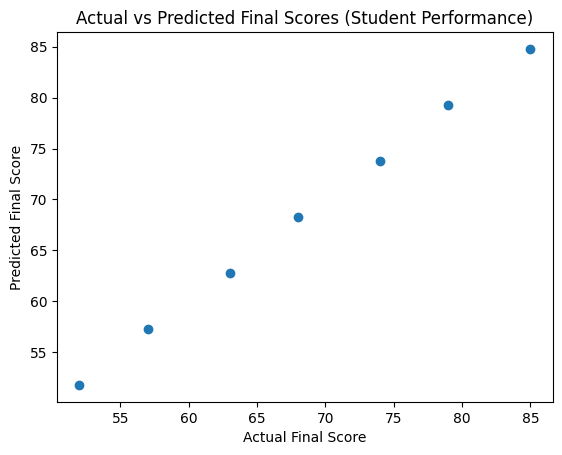

In [37]:
import matplotlib.pyplot as plt

# Assuming this plot is for the Student Performance Prediction
plt.scatter(y_student, student_model.predict(X_student))
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Actual vs Predicted Final Scores (Student Performance)")
plt.show()

In [38]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go

In [39]:
X,y=make_regression(n_samples=100,n_features=2,n_informative=2,n_targets=1,noise=50)

In [40]:
df=pd.DataFrame(X,columns=['x1','x2'])
df['y']=y

In [41]:
df.shape

(100, 3)

In [42]:
df.head()

,x1,x2,y
0,0.483439,1.147833,114.030680
1,0.964869,0.159758,-46.954974
2,-0.962637,1.350338,-82.745269
3,0.341834,-0.436054,90.044884
4,-1.678533,0.594636,-113.091914


In [43]:
fig=px.scatter_3d(df,x='x1',y='x2',z='y')
fig.show()

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred=lr.predict(X_test)

In [47]:
print("MSE",mean_squared_error(y_test,y_pred))
print("MAE",mean_absolute_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

MSE 1774.0107886480364
MAE 33.79752540039647
R2 0.8669495500264814


In [52]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Create grid
x_range = np.linspace(df['x1'].min(), df['x1'].max(), 30)
y_range = np.linspace(df['x2'].min(), df['x2'].max(), 30)

X_grid, Y_grid = np.meshgrid(x_range, y_range)

# Combine grid for prediction
grid_points = np.c_[X_grid.ravel(), Y_grid.ravel()]

# Predict on grid
Z_pred = lr.predict(grid_points)

# Reshape back to surface shape
Z_pred = Z_pred.reshape(X_grid.shape)

# Scatter plot (actual data)
fig = px.scatter_3d(df, x='x1', y='x2', z='y')

# Add regression surface
fig.add_trace(
    go.Surface(
        x=X_grid,
        y=Y_grid,
        z=Z_pred,
        opacity=0.5
    )
)

fig.show()
